# 🎬 Movie Recommendation System Project


## Context
With the explosion of OTT platforms like Netflix, Prime Video, and Hotstar, users often feel overwhelmed by the number of available movies. To enhance the user experience, **MyNextMovie**, a startup, aims to build a powerful recommendation system.

This project uses open-source **MovieLens** data to explore, design, and implement three types of movie recommendation systems:


## 🎯 Objectives
1. Popularity-Based Recommender
2. Content-Based Recommender
3. Collaborative Filtering Recommender

**Steps and Tasks:**

➢ Import libraries and load dataset

➢ Exploratory Data Analysis including:

• Understanding of distribution of the features available

• Finding unique users and movies

• Average rating and Total movies at genre level

• Unique genres considered.

➢ Design the 3 different types of recommendation modules as mentioned in the
objectives

➢ Additional/Optional: Create a GUI interface using Python libraries (ipywidgets etc.)
to play around with the recommendation modules.

## STEP 1: Load & Explore the Data

In [1]:
# Importing all neccessary Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity

In [2]:
#  Load Datasets
movies = pd.read_csv("movies.csv")
ratings = pd.read_csv("ratings.csv")


In [3]:
# First Look at the Data
print("🎬 Movies Dataset:")
print(movies.head(), "\n")

🎬 Movies Dataset:
   movieId                               title  \
0        1                    Toy Story (1995)   
1        2                      Jumanji (1995)   
2        3             Grumpier Old Men (1995)   
3        4            Waiting to Exhale (1995)   
4        5  Father of the Bride Part II (1995)   

                                        genres  
0  Adventure|Animation|Children|Comedy|Fantasy  
1                   Adventure|Children|Fantasy  
2                               Comedy|Romance  
3                         Comedy|Drama|Romance  
4                                       Comedy   



In [4]:
print("⭐ Ratings Dataset:")
print(ratings.head(), "\n")


⭐ Ratings Dataset:
   userId  movieId  rating   timestamp
0       1       16     4.0  1217897793
1       1       24     1.5  1217895807
2       1       32     4.0  1217896246
3       1       47     4.0  1217896556
4       1       50     4.0  1217896523 



In [5]:
# Basic Info
print("Movies shape:", movies.shape)
print("Ratings shape:", ratings.shape)

Movies shape: (10329, 3)
Ratings shape: (105339, 4)


In [6]:
print("Missing values in Movies:\n", movies.isnull().sum())
print("Missing values in Ratings:\n", ratings.isnull().sum())

Missing values in Movies:
 movieId    0
title      0
genres     0
dtype: int64
Missing values in Ratings:
 userId       0
movieId      0
rating       0
timestamp    0
dtype: int64


In [7]:
# Merge datasets on movieId
data = pd.merge(ratings, movies, on='movieId')
print("\n Merged Dataset Sample:")
print(data.head())



 Merged Dataset Sample:
   userId  movieId  rating   timestamp  \
0       1       16     4.0  1217897793   
1       1       24     1.5  1217895807   
2       1       32     4.0  1217896246   
3       1       47     4.0  1217896556   
4       1       50     4.0  1217896523   

                                       title                   genres  
0                              Casino (1995)              Crime|Drama  
1                              Powder (1995)             Drama|Sci-Fi  
2  Twelve Monkeys (a.k.a. 12 Monkeys) (1995)  Mystery|Sci-Fi|Thriller  
3                Seven (a.k.a. Se7en) (1995)         Mystery|Thriller  
4                 Usual Suspects, The (1995)   Crime|Mystery|Thriller  


## STEP 2: Model Exploratory Data Analysis
Now that we’ve seen how our models work, let’s explore the underlying data to understand movie genres and rating behavior.

In [8]:
# Unique Users and Movies
print("\n--- Unique Users and Movies ---")
print("\n👥 Number of Unique Users:", data['userId'].nunique())
print("🎞️Number of Unique Movies:", data['movieId'].nunique())


--- Unique Users and Movies ---

👥 Number of Unique Users: 668
🎞️Number of Unique Movies: 10325


In [9]:
# Average Rating per Movie
print("\n--- Average Rating per Movie ---")
avg_rating = data.groupby('title')['rating'].mean().sort_values(ascending=False)
print("\n📊 Top 5 Movies by Average Rating:")
print(avg_rating.head())




--- Average Rating per Movie ---

📊 Top 5 Movies by Average Rating:
title
Saddest Music in the World, The (2003)    5.0
Interstate 60 (2002)                      5.0
Gunfighter, The (1950)                    5.0
Heima (2007)                              5.0
Limelight (1952)                          5.0
Name: rating, dtype: float64


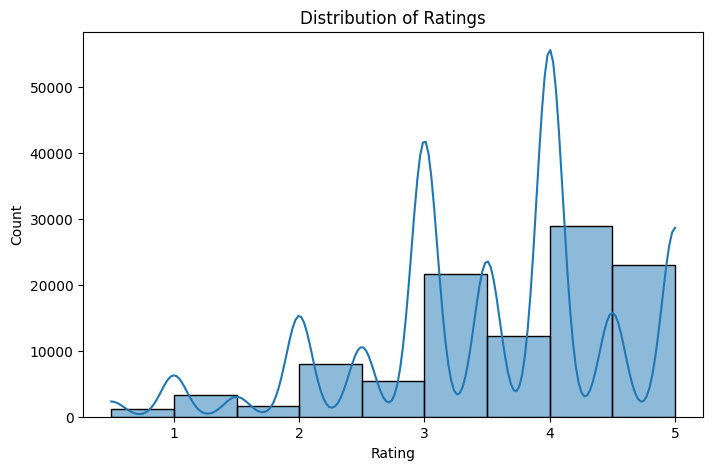

In [10]:
# Distribution of Ratings
plt.figure(figsize=(8, 5))
sns.histplot(data['rating'], bins=9, kde=True)
plt.title("Distribution of Ratings")
plt.xlabel("Rating")
plt.ylabel("Count")
plt.show()


In [11]:
# Genre Analysis
# Split genres by '|'
genre_data = movies.copy()
genre_data['genres'] = genre_data['genres'].str.split('|')
genres_exploded = genre_data.explode('genres')

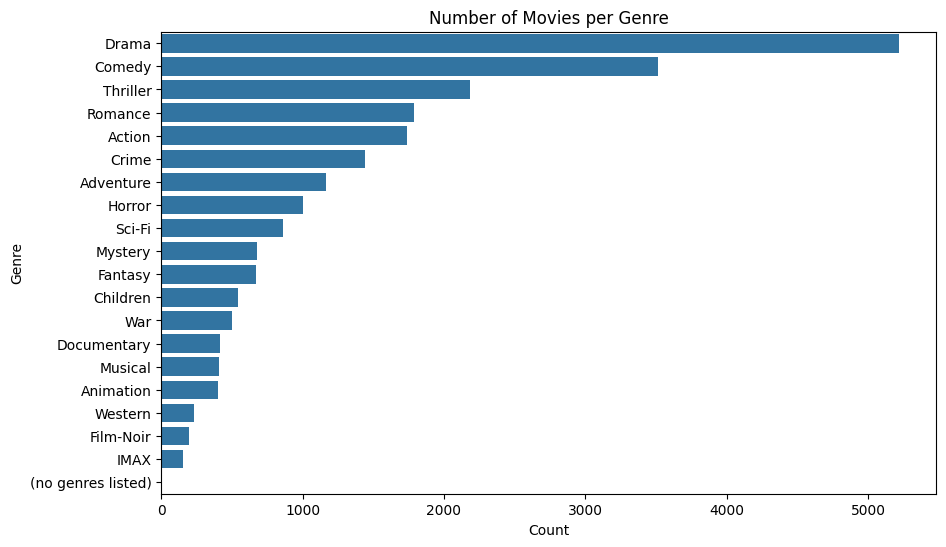

In [12]:
# Genre Frequency
plt.figure(figsize=(10, 6))
sns.countplot(data=genres_exploded, y='genres', order=genres_exploded['genres'].value_counts().index)
plt.title("Number of Movies per Genre")
plt.xlabel("Count")
plt.ylabel("Genre")
plt.show()


## Step 3: Popularity-Based Recommender System

In [13]:
def popularity_based_recommender(genre_input, min_reviews, top_n):
    movies_exploded = movies.copy()
    movies_exploded['genres'] = movies_exploded['genres'].str.split('|')
    movies_exploded = movies_exploded.explode('genres')
    
    # Filter by genre
    genre_movies = movies_exploded[movies_exploded['genres'] == genre_input]
    
    # Merge with ratings
    merged = pd.merge(ratings, genre_movies, on='movieId')
    
    # Group by movie title
    grouped = merged.groupby('title').agg({
        'rating': ['mean', 'count']
    }).reset_index()
    grouped.columns = ['title', 'avg_rating', 'num_reviews']
    
    # Filter by min_reviews and sort
    filtered = grouped[grouped['num_reviews'] >= min_reviews]
    result = filtered.sort_values(by='avg_rating', ascending=False).head(top_n)
    return result.reset_index(drop=True)


In [ ]:
# 📥 INPUT
genre = input("Enter Genre (e.g., Comedy): ")
min_reviews = int(input("Enter Minimum Number of Reviews: "))
top_n = int(input("Enter Number of Recommendations: "))

# 📤 OUTPUT
print("\n Popularity-Based Recommendations:")
print(popularity_based_recommender(genre, min_reviews, top_n))


 ## STEP :4 Content-Based Recommender System

In [ ]:
# Preprocessing
genre_tfidf = movies.copy()
genre_tfidf['genres'] = genre_tfidf['genres'].str.replace('|', ' ')
tfidf = TfidfVectorizer(stop_words='english')
tfidf_matrix = tfidf.fit_transform(genre_tfidf['genres'])

# Cosine similarity
cosine_sim = cosine_similarity(tfidf_matrix, tfidf_matrix)
title_to_index = pd.Series(genre_tfidf.index, index=genre_tfidf['title']).drop_duplicates()

def content_based_recommender(movie_title, top_n):
    if movie_title not in title_to_index:
        return f"❌ Movie '{movie_title}' not found in the dataset."
    
    idx = title_to_index[movie_title]
    sim_scores = list(enumerate(cosine_sim[idx]))
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)
    
    movie_indices = [i[0] for i in sim_scores[1:top_n+1]]
    return genre_tfidf[['title', 'genres']].iloc[movie_indices].reset_index(drop=True)


In [ ]:
# 📥 INPUT
movie_title = input("Enter Movie Title (e.g., Toy Story (1995)): ")
top_n = int(input("Enter Number of Similar Movies to Recommend: "))

# 📤 OUTPUT
print("\n🎯 Content-Based Recommendations:")
print(content_based_recommender(movie_title, top_n))


## STEP 4: Collaborative Filtering (User-User Based)

In [ ]:
# Create user-movie matrix
user_movie_matrix = ratings.pivot_table(index='userId', columns='movieId', values='rating')
user_movie_filled = user_movie_matrix.fillna(0)
user_similarity = cosine_similarity(user_movie_filled)
user_similarity_df = pd.DataFrame(user_similarity, index=user_movie_matrix.index, columns=user_movie_matrix.index)

def collaborative_recommender(user_id, k_similar_users, top_n):
    if user_id not in user_similarity_df.index:
        return f"❌ User ID {user_id} not found."

    # Find similar users
    sim_users = user_similarity_df[user_id].sort_values(ascending=False).drop(user_id).head(k_similar_users).index.tolist()
    sim_users_ratings = user_movie_matrix.loc[sim_users]

    # Exclude movies already rated by user
    user_rated = user_movie_matrix.loc[user_id].dropna().index
    mean_ratings = sim_users_ratings.drop(columns=user_rated, errors='ignore').mean().dropna()
    
    top_ids = mean_ratings.sort_values(ascending=False).head(top_n).index
    return movies[movies['movieId'].isin(top_ids)][['title']].reset_index(drop=True)


In [ ]:
# 📥 INPUT
user_id = int(input("Enter User ID (e.g., 1): "))
k_users = int(input("Enter Number of Similar Users (K): "))
top_n = int(input("Enter Number of Recommendations: "))

# 📤 OUTPUT
print("\n🎯 Collaborative Recommendations:")
print(collaborative_recommender(user_id, k_users, top_n))


## Conclusion

We built 3 types of recommendation systems:

- **Popularity-Based:** Great for quick picks in a genre.
- **Content-Based:** Suggests similar genre movies.
- **Collaborative Filtering:** Personalized for each user.

>  Future: Add matrix factorization or neural recommenders for improvement.
